# Import sea ice diagnostics, concatenate and save again

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cmocean as cmo
import matplotlib.pyplot as plt
import subprocess

import matplotlib.gridspec as gridspec

**User inputs**

In [2]:
# model info
diri      = '/g/data/gh9/wgh581/ROMS_Output/metroms_files/RAW/'
cntr_expt = 'metroms_CONTROL' 
pert_expt = 'metroms_4SSFLUX'
pert_2SSFLUX_expt = 'metroms_2SSFLUX'

# variable names
#varname   = ['dvidtt','dvidtd']
#varname   = ['aice','hi']
varname   = ['uvel','vvel']

#time domain for each experimnt
yrst = 2002 ; mst = 2
yren = 2011 ; men = 11 

#spatial domain (self-explanatory)
latmax = -50.
lonmin = 140#150.
lonmax = 300#300. 

# output file destination
path_to_data = '/g/data/gh9/wgh581/ROMS_Output/metroms_files/POST_PROCESS/'

**Function to read data for each experiment**

In [4]:
def get_dat(ename):
    
    yrstr = [str(int) for int in np.arange(yrst, 1+yren)] 
    CMD  = 'ls '+diri+ename+'/cice/history/iceh.{'+','.join(yrstr)+'}-??-??.nc'
    fili = subprocess.run(CMD, shell=True, capture_output=True)  #run CMD as a bash command
    fili = fili.stdout.decode().split('\n')[0:-1] 
    
    data = xr.open_mfdataset(fili, parallel=True)
    var  = data[varname]
   
    # reduce to specified spatial domain
    #var = var.where((data.TLAT <= latmax) & (data.TLON >= lonmin) & (data.TLON <= lonmax), drop=True)

    # get required time domain (time mean of)
    stdat = str(yrst)+'-'+str(mst)
    endat = str(yren)+'-'+str(men)
    var   = var.sel(time = slice(stdat,endat))#.mean('time')
               
    return var

**Load and save data**

Volume tendency

In [7]:
varname   = ['dvidtt','dvidtd']

In [15]:
%%time
cntr = get_dat(cntr_expt).load()
cntr.to_netcdf(path_to_data + 'dvdt_CONTROL_2002_2011_full_circumpolar.nc')

CPU times: user 3min 30s, sys: 1min 45s, total: 5min 16s
Wall time: 4min 52s


In [8]:
pert = get_dat(pert_expt).load()
pert.to_netcdf(path_to_data + 'dvdt_4SSFLUX_2002_2011_full_circumpolar.nc')

In [16]:
pert_2SSFLUX = get_dat(pert_2SSFLUX_expt).load()
pert_2SSFLUX.to_netcdf(path_to_data + 'dvdt_2SSFLUX_2002_2011_full_circumpolar.nc')

Sea ice area and hight

In [5]:
varname   = ['aice','hi']

In [6]:
%%time
cntr = get_dat(cntr_expt).load()
cntr.to_netcdf(path_to_data + 'aice_hi_CONTROL_2002_2011_full_circumpolar.nc')

CPU times: user 3min 37s, sys: 1min 58s, total: 5min 35s
Wall time: 6min 2s


In [6]:
pert = get_dat(pert_expt).load()
pert.to_netcdf(path_to_data + 'aice_hi_4SSFLUX_2002_2011_full_circumpolar.nc')

In [10]:
pert_2SSFLUX = get_dat(pert_2SSFLUX_expt).load()
pert_2SSFLUX.to_netcdf(path_to_data + 'aice_hi_2SSFLUX_2002_2011_full_circumpolar.nc')

Sea ice velocity

In [9]:
varname   = ['uvel','vvel']

In [12]:
%%time
cntr = get_dat(cntr_expt).load()
cntr.to_netcdf(path_to_data + 'uvel_vvel_CONTROL_2002_2011_full_circumpolar.nc')

CPU times: user 3min 25s, sys: 1min 45s, total: 5min 10s
Wall time: 4min 3s


In [10]:
pert = get_dat(pert_expt).load()
pert.to_netcdf(path_to_data + 'uvel_vvel_4SSFLUX_2002_2011_full_circumpolar.nc')

In [13]:
pert_2SSFLUX = get_dat(pert_2SSFLUX_expt).load()
pert_2SSFLUX.to_netcdf(path_to_data + 'uvel_vvel_2SSFLUX_2002_2011_full_circumpolar.nc')

---

Testing data

In [9]:
aice_2SSFLUX = xr.open_dataset(path_to_data + 'aice_hi_2SSFLUX_2002_2011_full.nc')
aice_2SSFLUX

<xarray.Dataset>
Dimensions:  (time: 716, nj: 328, ni: 638)
Coordinates:
  * time     (time) datetime64[ns] 2002-02-12 2002-02-17 ... 2011-11-27
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables:
    aice     (time, nj, ni) float32 ...
    hi       (time, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model (CICE) Version 5
    comment:      This year has 365 days
    comment2:     File written on model date 20020212
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2019-03-12 at 19:06:49.8
    io_flavor:    io_netcdf

In [10]:
uvel_2SSFLUX = xr.open_dataset(path_to_data + 'uvel_vvel_2SSFLUX_2002_2011_full.nc')
uvel_2SSFLUX

<xarray.Dataset>
Dimensions:  (time: 716, nj: 328, ni: 638)
Coordinates:
  * time     (time) datetime64[ns] 2002-02-12 2002-02-17 ... 2011-11-27
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables:
    uvel     (time, nj, ni) float32 ...
    vvel     (time, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model (CICE) Version 5
    comment:      This year has 365 days
    comment2:     File written on model date 20020212
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2019-03-12 at 19:06:49.8
    io_flavor:    io_netcdf

In [11]:
dvdt_2SSFLUX = xr.open_dataset(path_to_data + 'dvdt_2SSFLUX_2002_2011_full.nc')
dvdt_2SSFLUX

<xarray.Dataset>
Dimensions:  (time: 716, nj: 328, ni: 638)
Coordinates:
  * time     (time) datetime64[ns] 2002-02-12 2002-02-17 ... 2011-11-27
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables:
    dvidtt   (time, nj, ni) float32 ...
    dvidtd   (time, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model (CICE) Version 5
    comment:      This year has 365 days
    comment2:     File written on model date 20020212
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2019-03-12 at 19:06:49.8
    io_flavor:    io_netcdf

In [46]:
data = cntr
data

<xarray.Dataset>
Dimensions:  (time: 77, nj: 328, ni: 638)
Coordinates:
  * time     (time) datetime64[ns] 2002-02-12 2002-02-17 ... 2003-02-27
    TLON     (nj, ni) float32 116.4 116.6 116.8 117.0 ... 299.4 299.6 299.9
    TLAT     (nj, ni) float32 -79.44 -79.47 -79.49 ... -49.69 -49.69 -49.69
    ULON     (nj, ni) float32 116.5 116.7 116.9 117.0 ... 299.5 299.8 300.0
    ULAT     (nj, ni) float32 -79.45 -79.48 -79.51 -79.53 ... -49.61 -49.6 -49.6
Dimensions without coordinates: nj, ni
Data variables:
    aice     (time, nj, ni) float32 nan nan nan nan nan ... nan nan nan nan nan
    hi       (time, nj, ni) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model (CICE) Version 5
    comment:      This year has 365 days
    comment2:     File written on model date 20020212
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2019-05-17 at 15:06:58.1
    io_flavor:    io_netcdf

In [49]:
# Spherical coordinates
deg2rad = np.pi/180.0

# CICE
x_cice = -(data.TLAT+90)*np.cos(data.TLON*deg2rad+np.pi/2)
y_cice =  (data.TLAT+90)*np.sin(data.TLON*deg2rad+np.pi/2)

In [27]:
# Load roms data for plotting
roms = xr.open_dataset('/g/data/gh9/wgh581/ROMS_Output/metroms_files/' + 'RAW/metroms_CONTROL/' + 'ocean_his_0042.nc')
lat_roms = roms.lat_rho[:-15,:-1]#.where((roms.lat_rho <= latmax) & (roms.lon_rho >= lonmin) & (roms.lon_rho <= lonmax), drop=True)[1:,:]
lon_roms = roms.lon_rho[:-15,:-1]#.where((roms.lat_rho <= latmax) & (roms.lon_rho >= lonmin) & (roms.lon_rho <= lonmax), drop=True)[1:,:]
zice     = roms.zice[:-15,:-1]#.where((roms.lat_rho <= latmax) & (roms.lon_rho >= lonmin) & (roms.lon_rho <= lonmax), drop=True)[1:,:]
h        = roms.h[:-15,:-1]#.where((roms.lat_rho <= latmax) & (roms.lon_rho >= lonmin) & (roms.lon_rho <= lonmax), drop=True)[1:,:]
mask     = roms.mask_rho[:-15,:-1]#.where((roms.lat_rho <= latmax) & (roms.lon_rho >= lonmin) & (roms.lon_rho <= lonmax), drop=True)[1:,:]

In [28]:
# Masking
h     = np.ma.masked_where(mask==0, h)
zice  = np.ma.masked_where(mask==0, zice)
zice  = np.ma.masked_where(zice==0, zice)
lat_r = np.ma.masked_where(mask==1, lat_roms)

In [29]:
# ROMS
x_roms = -(lat_roms+90)*np.cos(lon_roms*deg2rad+np.pi/2)
y_roms =  (lat_roms+90)*np.sin(lon_roms*deg2rad+np.pi/2)

In [30]:
# Center of missing circle (ROMS)
lat_c   = -83
lon_c   = 50
# Radius of missing circle (play around with this until it works)
radius  = 10.1
# Find center in spherical coordinates
x_c_metroms = -(lat_c+90)*np.cos(lon_c*deg2rad+np.pi/2)
y_c_metroms =  (lat_c+90)*np.sin(lon_c*deg2rad+np.pi/2)
# Build a regular x-y grid and select the missing circle
lat_max = -63+90
x_reg, y_reg = np.meshgrid(np.linspace(-lat_max, lat_max, num=1000), np.linspace(-lat_max, lat_max, num=1000))
land_circle  = np.zeros(np.shape(x_reg))
land_circle_metroms = np.ma.masked_where(np.sqrt((x_reg-x_c_metroms)**2 + (y_reg-y_c_metroms)**2) > radius, land_circle)

In [31]:
# Region range
xlim_min = -25
xlim_max = 15
ylim_min = -30
ylim_max = 7

In [37]:
def plot_region():
    plt.tick_params(labelleft=False, labelbottom=False)
    plt.contourf(x_reg, y_reg, land_circle_metroms, colors='0.5')
    plt.contourf(x_roms, y_roms, lat_r, colors='0.5')
    plt.contourf(x_roms, y_roms, zice*1, colors='k')
    plt.contour(x_roms, y_roms, h, levels=[1000], colors='k', linewidths=0.5)
    #plt.contour(x_cice, y_cice, aice_cntr[ii,:,:], levels=[aice_extmin], colors='0.5', linewidths=1)
    plt.tick_params(axis='both', which='both', length=0)
    plt.xlim(xlim_min, xlim_max)
    plt.ylim(ylim_min, ylim_max)

/jobfs/67647663.gadi-pbs/ipykernel_212394/1333081417.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  sc = plt.pcolormesh(x_cice, y_cice, test.vvel[0,:,:])#diff_total_seasonal[ii]*90*1e-2, vmin=-0.5, vmax=0.5, cmap=Vik_19_r.mpl_colormap)


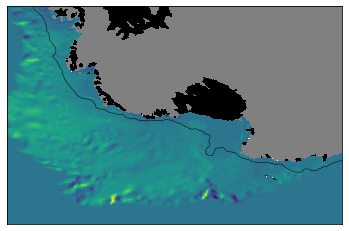

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111)
sc = plt.pcolormesh(x_cice, y_cice, data.vvel[0,:,:])#diff_total_seasonal[ii]*90*1e-2, vmin=-0.5, vmax=0.5, cmap=Vik_19_r.mpl_colormap)
plot_region()

